In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

In [3]:
rawdata=[]
for line in open('M67_data.txt','r').read().split('\n'):
    rawdata.append(line.split(' '))
print(rawdata[0])
data=[]
for stardata in rawdata[1:]:
    if len(stardata)==len(rawdata[0]):
        data.append(stardata)

ages=[]
age_sigmas=[]
for stardata in data:
    age=float(stardata[-1].split('(')[0])
    sigma=stardata[-1].split('(')[1][:-1]
    if '.' not in sigma:
        sigma=float('0.'+sigma)
    else: sigma=float(sigma)
    ages.append(age)
    age_sigmas.append(sigma)
Xobs=ages
sigma_obs=np.average(age_sigmas)
N=len(ages)
print(np.mean(ages),sigma_obs)

['EPIC_ID', 'WOCS_ID', 'Class', 'Î½max', 'âˆ†Î½', 'Teff/K', 'Rsc', 'Msc', 'log_gsc', 'Rcorr', 'Mcorr', 'Rgrid', 'Mgrid', 'log_ggrid', 'Agegrid']
4.787096774193548 1.5612903225806454


In [8]:
#hyperprior
Mu=4
del_mu=40
Sigma=0.5
del_sigma=5

#HMC
model=pm.Model()
with model:
    mu=pm.Lognormal('mu',np.log10(Mu),np.log10(del_mu))
    sigma=pm.HalfNormal('sigma',np.log10(del_sigma))
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, np.array(age_sigmas), observed=Xobs)

with model:
    trace = pm.sample(tune=50000,chains=4,target_accept=0.9)

pm.summary(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [xtrue, sigma, mu]
Sampling 4 chains: 100%|███████████████████████████████████████████████████| 202000/202000 [07:59<00:00, 421.46draws/s]
The acceptance probability does not match the target. It is 0.8295506031643849, but should be close to 0.9. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
xtrue__0,3.820960,0.802214,0.021411,2.328063,5.567551,1376.769285,0.999509
xtrue__1,3.966592,0.863704,0.026735,2.288579,5.764821,759.990656,1.000928
xtrue__2,3.799245,0.794584,0.021445,2.260011,5.565815,1543.532260,1.000328
xtrue__3,4.122004,0.870070,0.031893,2.763525,6.130577,565.320318,1.000340
xtrue__4,3.926051,0.808483,0.023272,2.401932,5.691271,971.383863,0.999675
xtrue__5,3.702511,0.753603,0.015553,2.261326,5.247090,2424.808726,0.999402
xtrue__6,3.921761,0.823469,0.024793,2.404804,5.680338,955.351431,1.000514
xtrue__7,5.018010,1.216398,0.071520,3.190291,7.535709,179.350837,1.007349
xtrue__8,4.030835,0.531850,0.018624,3.066977,5.107987,591.279945,1.000391
xtrue__9,3.329363,0.633992,0.015896,2.053028,4.588663,1706.666660,1.001966


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000260FF04EDD8>,
      dtype=object)

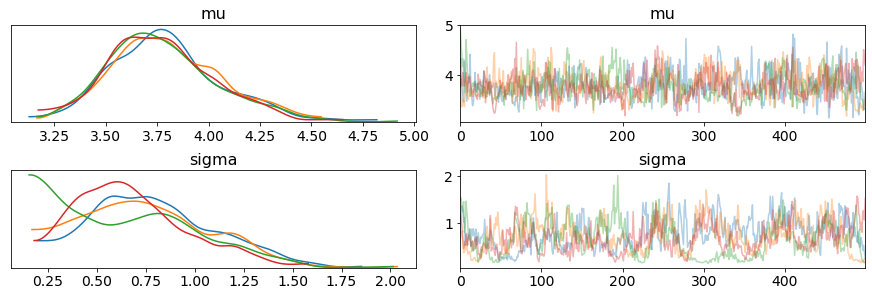

In [9]:
pm.plots.traceplot(trace,var_names=['mu','sigma'])

In [24]:
#round 2, with bigger observational errors
#1.5
#hyperprior
Mu=4
del_mu=40
Sigma=0.5
del_sigma=5

#HMC
model=pm.Model()
with model:
    mu=pm.Lognormal('mu',np.log10(Mu),np.log10(del_mu))
    sigma=pm.HalfNormal('sigma',np.log10(del_sigma))
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, np.array(age_sigmas)*1.5, observed=Xobs)

with model:
    traceA = pm.sample(tune=50000,chains=4,target_accept=0.9)

pm.summary(traceA,var_names=['mu','sigma'])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [xtrue, sigma, mu]
Sampling 4 chains: 100%|███████████████████████████████████████████████████| 202000/202000 [09:55<00:00, 339.01draws/s]
There were 50 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8182793173367735, but should be close to 0.9. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 41 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,3.576296,0.246958,0.017181,3.170380,4.058753,85.970652,1.013217
sigma,0.307172,0.192462,0.015292,0.034671,0.658260,59.453846,1.034863


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002608A7F8A90>,
      dtype=object)

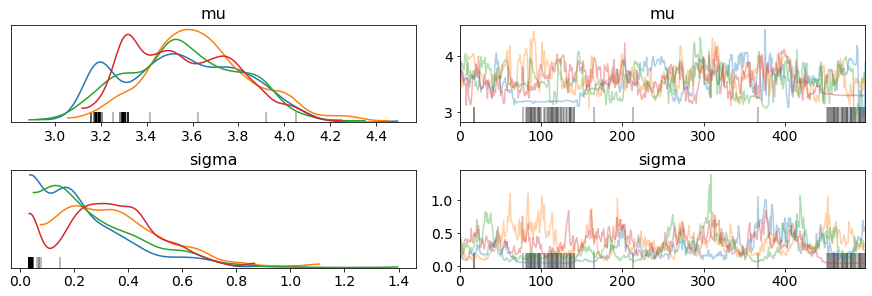

In [25]:
pm.plots.traceplot(traceA,var_names=['mu','sigma'])

In [26]:
#2.0
#hyperprior
Mu=4
del_mu=40
Sigma=0.5
del_sigma=5

#HMC
model=pm.Model()
with model:
    mu=pm.Lognormal('mu',np.log10(Mu),np.log10(del_mu))
    sigma=pm.HalfNormal('sigma',np.log10(del_sigma))
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, np.array(age_sigmas)*2, observed=Xobs)

with model:
    traceB = pm.sample(tune=50000,chains=4,target_accept=0.9)

pm.summary(traceB,var_names=['mu','sigma'])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [xtrue, sigma, mu]
Sampling 4 chains: 100%|███████████████████████████████████████████████████| 202000/202000 [09:58<00:00, 337.54draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 48 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7892521499782218, but should be close to 0.9. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9707293371337288, but should be close to 0.9. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for so

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,3.571546,0.267783,0.018145,3.097813,4.169931,116.557125,1.011050
sigma,0.284170,0.200425,0.017083,0.029701,0.705251,28.003304,1.081138


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000260FE5F0C88>,
      dtype=object)

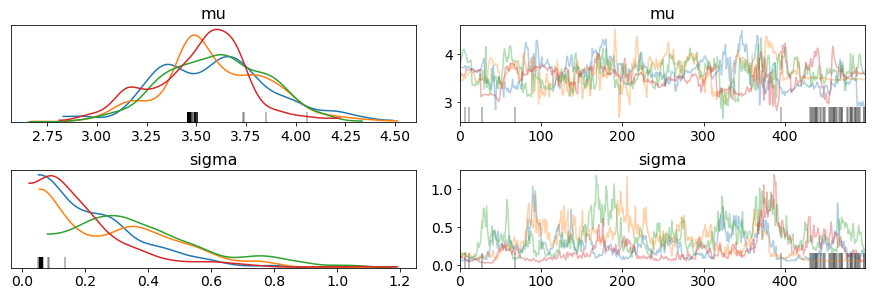

In [27]:
pm.plots.traceplot(traceB,var_names=['mu','sigma'])

In [28]:
#2.5
#hyperprior
Mu=4
del_mu=40
Sigma=0.5
del_sigma=5

#HMC
model=pm.Model()
with model:
    mu=pm.Lognormal('mu',np.log10(Mu),np.log10(del_mu))
    sigma=pm.HalfNormal('sigma',np.log10(del_sigma))
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, np.array(age_sigmas)*2, observed=Xobs)

with model:
    traceC = pm.sample(tune=50000,chains=4,target_accept=0.9)

pm.summary(traceC,var_names=['mu','sigma'])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [xtrue, sigma, mu]
Sampling 4 chains: 100%|███████████████████████████████████████████████████| 202000/202000 [10:05<00:00, 333.55draws/s]
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 42 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8268977740774741, but should be close to 0.9. Try to increase the number of tuning steps.
There were 142 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6458951798562189, but should be close to 0.9. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9792066498881389, but should be close to 0.9. Try to increase the number of tuning steps.
The gelman-rubin statistic i

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,3.527232,0.275818,0.019693,2.958001,4.073827,72.760368,1.037022
sigma,0.297551,0.204366,0.017072,0.033481,0.685107,21.029337,1.130631


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000260832D6860>,
      dtype=object)

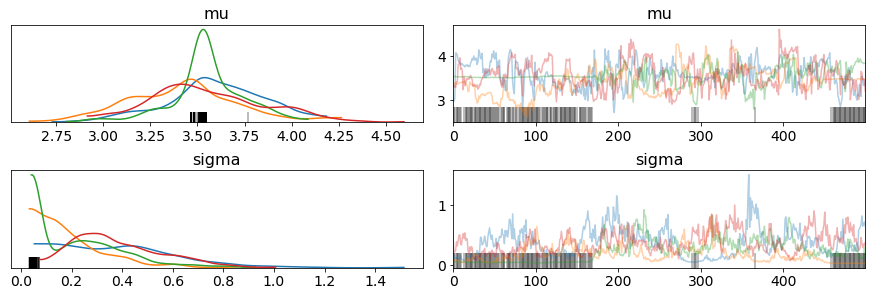

In [29]:
pm.plots.traceplot(traceC,var_names=['mu','sigma'])

In [30]:
#2.5
#hyperprior
Mu=4
del_mu=40
Sigma=0.5
del_sigma=5

#HMC
model=pm.Model()
with model:
    mu=pm.Lognormal('mu',np.log10(Mu),np.log10(del_mu))
    sigma=pm.HalfNormal('sigma',np.log10(del_sigma))
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, np.array(age_sigmas)*2.5, observed=Xobs)

with model:
    traceD = pm.sample(tune=50000,chains=4,target_accept=0.9)

pm.summary(traceD,var_names=['mu','sigma'])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [xtrue, sigma, mu]
Sampling 4 chains: 100%|███████████████████████████████████████████████████| 202000/202000 [10:00<00:00, 336.39draws/s]
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 80 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6874740524072391, but should be close to 0.9. Try to increase the number of tuning steps.
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7896577713268065, but should be close to 0.9. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,3.587873,0.320972,0.022060,2.947598,4.183974,69.133805,1.048011
sigma,0.319511,0.232962,0.019581,0.041370,0.772730,36.945541,1.016101


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000260814CBBA8>,
      dtype=object)

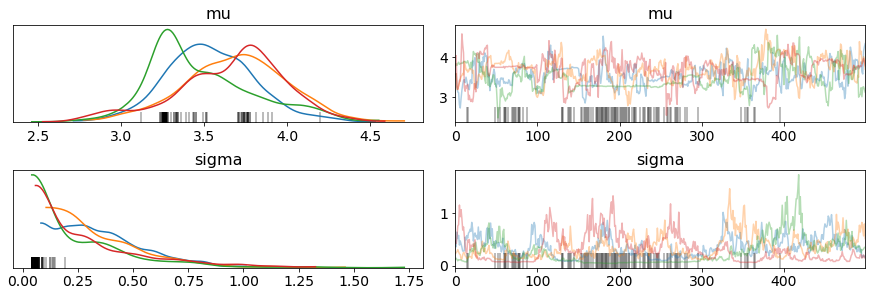

In [31]:
pm.plots.traceplot(traceD,var_names=['mu','sigma'])

In [32]:
#3.0
#hyperprior
Mu=4
del_mu=40
Sigma=0.5
del_sigma=5

#HMC
model=pm.Model()
with model:
    mu=pm.Lognormal('mu',np.log10(Mu),np.log10(del_mu))
    sigma=pm.HalfNormal('sigma',np.log10(del_sigma))
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, np.array(age_sigmas)*3, observed=Xobs)

with model:
    traceE = pm.sample(tune=50000,chains=4,target_accept=0.9)

pm.summary(traceE,var_names=['mu','sigma'])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [xtrue, sigma, mu]
Sampling 4 chains: 100%|███████████████████████████████████████████████████| 202000/202000 [10:17<00:00, 327.32draws/s]
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8325664384162801, but should be close to 0.9. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,3.534558,0.398675,0.028171,2.725178,4.243791,149.649082,1.012153
sigma,0.398131,0.229831,0.017149,0.083847,0.844445,77.503422,1.066212


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002608D822470>,
      dtype=object)

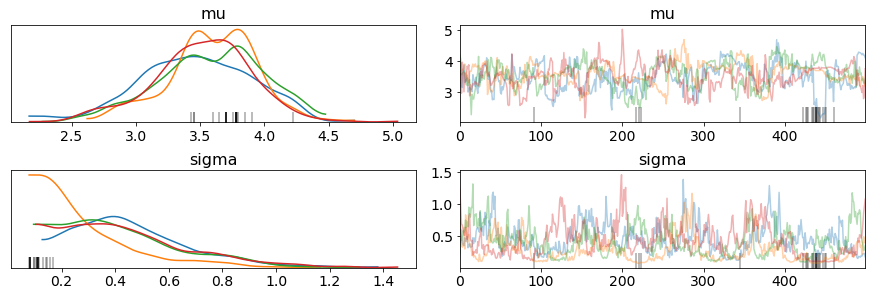

In [33]:
pm.plots.traceplot(traceE,var_names=['mu','sigma'])

In [34]:
#3.5
#hyperprior
Mu=4
del_mu=40
Sigma=0.5
del_sigma=5

#HMC
model=pm.Model()
with model:
    mu=pm.Lognormal('mu',np.log10(Mu),np.log10(del_mu))
    sigma=pm.HalfNormal('sigma',np.log10(del_sigma))
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, np.array(age_sigmas)*3.5, observed=Xobs)

with model:
    traceF = pm.sample(tune=50000,chains=4,target_accept=0.9)

pm.summary(traceF,var_names=['mu','sigma'])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [xtrue, sigma, mu]
Sampling 4 chains: 100%|███████████████████████████████████████████████████| 202000/202000 [10:22<00:00, 324.30draws/s]
There were 53 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.779734401969495, but should be close to 0.9. Try to increase the number of tuning steps.
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.82171495938603, but should be close to 0.9. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,3.468140,0.446791,0.033104,2.609454,4.311638,72.498219,1.007769
sigma,0.447068,0.242787,0.018935,0.088684,0.903649,69.224710,1.012419


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002608340E780>,
      dtype=object)

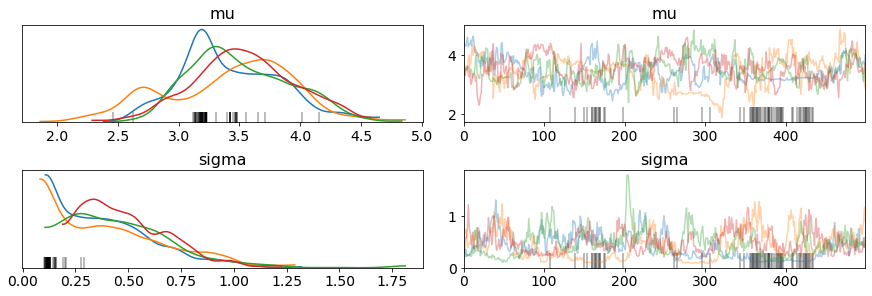

In [35]:
pm.plots.traceplot(traceF,var_names=['mu','sigma'])

In [36]:
#4.0
#hyperprior
Mu=4
del_mu=40
Sigma=0.5
del_sigma=5

#HMC
model=pm.Model()
with model:
    mu=pm.Lognormal('mu',np.log10(Mu),np.log10(del_mu))
    sigma=pm.HalfNormal('sigma',np.log10(del_sigma))
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, np.array(age_sigmas)*4, observed=Xobs)

with model:
    traceG = pm.sample(tune=50000,chains=4,target_accept=0.9)

pm.summary(traceG,var_names=['mu','sigma'])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [xtrue, sigma, mu]
Sampling 4 chains: 100%|███████████████████████████████████████████████████| 202000/202000 [10:35<00:00, 317.67draws/s]
There were 323 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.2567900133142727, but should be close to 0.9. Try to increase the number of tuning steps.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,3.504256,0.564239,0.045457,2.269923,4.473455,38.650041,1.073320
sigma,0.412763,0.285795,0.024159,0.086345,0.960852,12.567603,1.172778


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000260833CCA58>,
      dtype=object)

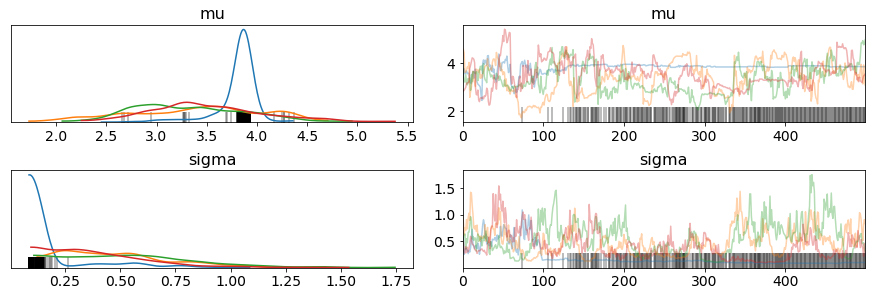

In [37]:
pm.plots.traceplot(traceG,var_names=['mu','sigma'])

In [38]:
#4.5
#hyperprior
Mu=4
del_mu=40
Sigma=0.5
del_sigma=5

#HMC
model=pm.Model()
with model:
    mu=pm.Lognormal('mu',np.log10(Mu),np.log10(del_mu))
    sigma=pm.HalfNormal('sigma',np.log10(del_sigma))
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, np.array(age_sigmas)*4.5, observed=Xobs)

with model:
    traceH = pm.sample(tune=50000,chains=4,target_accept=0.9)

pm.summary(traceH,var_names=['mu','sigma'])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [xtrue, sigma, mu]
Sampling 4 chains: 100%|███████████████████████████████████████████████████| 202000/202000 [10:52<00:00, 309.57draws/s]
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8199006792492041, but should be close to 0.9. Try to increase the number of tuning steps.
There were 83 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5950382596710135, but should be close to 0.9. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 30 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8237825387021259, but should be clo

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,3.450961,0.597250,0.047759,2.266972,4.757545,60.962486,1.038943
sigma,0.432848,0.283439,0.022819,0.080779,0.965101,51.252028,1.028047


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002608FD0D3C8>,
      dtype=object)

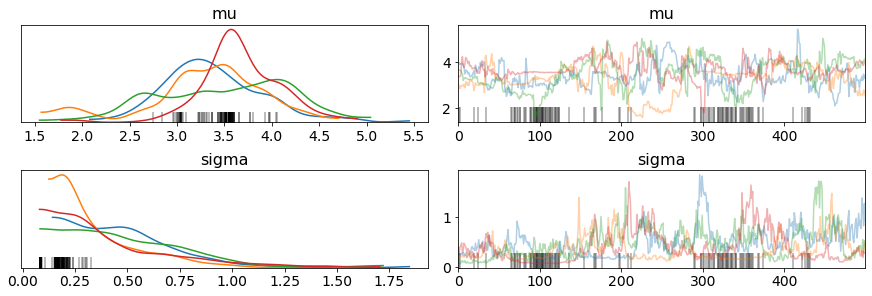

In [39]:
pm.plots.traceplot(traceH,var_names=['mu','sigma'])

In [40]:
#5.0
#hyperprior
Mu=4
del_mu=40
Sigma=0.5
del_sigma=5

#HMC
model=pm.Model()
with model:
    mu=pm.Lognormal('mu',np.log10(Mu),np.log10(del_mu))
    sigma=pm.HalfNormal('sigma',np.log10(del_sigma))
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, np.array(age_sigmas)*5, observed=Xobs)

with model:
    traceI = pm.sample(tune=50000,chains=4,target_accept=0.9)

pm.summary(traceI,var_names=['mu','sigma'])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [xtrue, sigma, mu]
Sampling 4 chains: 100%|███████████████████████████████████████████████████| 202000/202000 [19:58<00:00, 168.55draws/s]
There were 464 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.0674253524869735, but should be close to 0.9. Try to increase the number of tuning steps.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 19 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7602767109865535, but should be close to 0.9. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.2 for some parameters.
The estimated number of effect

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,3.396005,0.502530,0.039314,2.189490,4.433871,33.074597,1.040350
sigma,0.396967,0.284535,0.024208,0.078249,0.945927,5.403748,1.361917


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002608FC6BB00>,
      dtype=object)

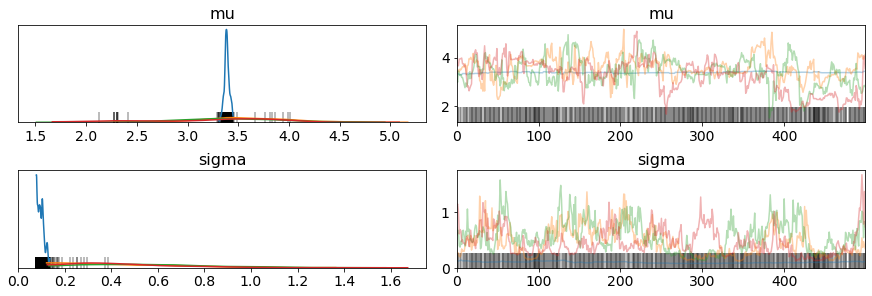

In [41]:
pm.plots.traceplot(traceI,var_names=['mu','sigma'])

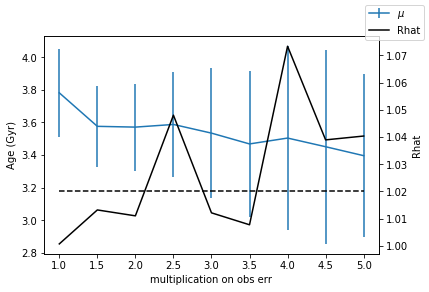

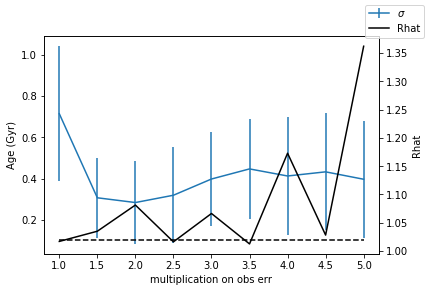

In [63]:
#results of the tests with multiples of obs error
multiplication=[1,1.5,2,2.5,3,3.5,4,4.5,5]
est_mu=[3.782204,3.576296, 3.571546, 3.587873, 3.534558, 3.468140, 3.504256, 3.450961, 3.396005]
est_mu_err=[0.268484,0.246958, 0.267783, 0.320972, 0.398675, 0.446791, 0.564239, 0.597250, 0.502530]
est_mu_Rhat=[1.000742,1.013217, 1.011050, 1.048011, 1.012153, 1.007769, 1.073320, 1.038943, 1.040350]
est_sigma=[0.714379,0.307172, 0.284170, 0.319511, 0.398131, 0.447068, 0.412763, 0.432848, 0.396967]
est_sigma_err=[0.326855,0.192462, 0.200425, 0.232962, 0.229831, 0.242787, 0.285795, 0.283439, 0.284535]
est_sigma_Rhat=[1.016839,1.034863, 1.081138, 1.016101, 1.066212, 1.012419, 1.172778, 1.028047, 1.361917]

fig,ax1=plt.subplots()
ax1.errorbar(multiplication,est_mu,yerr=est_mu_err,label=r'$\mu$')
ax1.set_xlabel('multiplication on obs err')
ax1.set_ylabel('Age (Gyr)')
ax2 = ax1.twinx()
ax2.hlines(1.02,min(multiplication),max(multiplication),ls='--')
ax2.plot(multiplication,est_mu_Rhat,label='Rhat',color='k')
ax2.set_ylabel('Rhat')
fig.legend()
plt.show()

fig,ax1=plt.subplots()
ax1.errorbar(multiplication,est_sigma,yerr=est_sigma_err,label=r'$\sigma$')
ax1.set_xlabel('multiplication on obs err')
ax1.set_ylabel('Age (Gyr)')
ax2 = ax1.twinx()
ax2.hlines(1.02,min(multiplication),max(multiplication),ls='--')
ax2.plot(multiplication,est_sigma_Rhat,label='Rhat',color='k')
ax2.set_ylabel('Rhat')
fig.legend()
plt.show()

In [45]:
pm.summary(trace,var_names=['mu','sigma'],tofile='test.csv')

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,3.548318,0.702317,0.062108,2.260470,4.816230,41.86957,1.028061
sigma,0.514177,0.377441,0.034530,0.086453,1.315488,25.39434,1.004812
